### Importamos la librerias

In [1]:
from libreria import *
from pathlib import Path

RAW_DIR = Path("./data/raw")      # <‑‑ coloca los ZIP/CSV descargados aquí
PREP_DIR = Path("./data/processed")
PREP_DIR.mkdir(parents=True, exist_ok=True)

In [2]:
# Assuming your joblib files are in a specific folder
MODEL_DIR = Path("./model_artifacts_text_1")  # Adjust this path to where your joblib files are stored

# Load the preprocessors from joblib files
preproc   = joblib.load("modelos/PruebaTest/feature_pipeline.joblib")
y_scaler  = joblib.load("modelos/PruebaTest/y_scaler.joblib")

In [3]:
preproc

ColumnTransformer(n_jobs=-1,
                  transformers=[('pct',
                                 FunctionTransformer(feature_names_out='one-to-one',
                                                     func=<function pct_transform at 0x0000020BB41354E0>),
                                 ['C1_EXCAVACION', 'C1_CIMENTACION',
                                  'C1_DESAGUES', 'C2_ESTRUCTURA',
                                  'C2_INST_HIDELEC', 'C2_CUBIERTA',
                                  'C3_MAMPOSTERIA', 'C3_PANETE',
                                  'C4_PISO_ENCHAPE', 'C4_CARP_METALICA',
                                  'C4_CARP_MADERA', 'C4_CIELO_RASO',
                                  'C5_V...
                                  'NUMUNIXVEN', 'UNIDEC_RANVIVI_1',
                                  'UNIDEC_RANVIVI_2', 'UNIDEC_RANVIVI_3',
                                  'UNIDEC_RANVIVI_4', 'UNIDEC_RANVIVI_5',
                                  'UNIDEC_RANVIVI_6']),
                                ('bin', 'passthrough',
                                 ['AMPLIACION', 'OB_FORMAL',
                                  'LIC_RADICADO_SN']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['DPTO_MPIO', 'ESTRATO', 'DESTINO2',
                                  'ESTADO_ACT', 'SIS_CONSTR', 'USO', 'USO_DOS',
                                  'RANVIVI', 'TIPOVRDEST', 'TRIMESTRE'])])

In [4]:
y_scaler

StandardScaler()

In [23]:
# Verifica el estado del y_scaler
print("Scaler mean:", y_scaler.mean_)
print("Scaler scale:", y_scaler.scale_)

# Verifica los valores de y1_train y y1_val
print("Rango y1_train:", y1_train.min(), y1_train.max())
print("Rango y1_val:", y1_val.min(), y1_val.max())

Scaler mean: [1419.5840403]
Scaler scale: [1277.0447456]
Rango y1_train: -1.1108334654569443 23.946236860522323
Rango y1_val: 19.0 28500.0


In [9]:
# Verifica el estado del y_scaler
print("Scaler mean:", y_scaler.mean_)
print("Scaler scale:", y_scaler.scale_)

# Verifica los valores de y1_train y y1_val
print("Rango y1_train:", y1_train.min(), y1_train.max())
print("Rango y1_val:", y1_val.min(), y1_val.max())


Scaler mean: [1424.8239011]
Scaler scale: [1278.40249732]
Rango y1_train: -1.11375244032068 23.916705546966103
Rango y1_val: -1.0996723677005618 21.178913648609786


In [5]:
X1_train_trans, X1_val_trans, y1_train, y1_val = inferencia_dataset(PREP_DIR / "dataset_II_Clean.csv", "modelos/PruebaTest/feature_pipeline.joblib", "modelos/PruebaTest/y_scaler.joblib")

In [6]:
X2_train_trans, X2_val_trans, y2_train, y2_val = inferencia_dataset(PREP_DIR / "dataset_III_Clean.csv", "modelos/PruebaTest/feature_pipeline.joblib", "modelos/PruebaTest/y_scaler.joblib")

In [7]:
X3_train_trans, X3_val_trans, y3_train, y3_val = inferencia_dataset(PREP_DIR / "dataset_IV_Clean.csv", "modelos/PruebaTest/feature_pipeline.joblib", "modelos/PruebaTest/y_scaler.joblib")

In [8]:
X1_train_trans.shape, X1_val_trans.shape, y1_train.shape, y1_val.shape

((2221956, 179), (555490, 179), (2221956,), (555490, 1))

In [9]:
X2_train_trans.shape, X2_val_trans.shape, y2_train.shape, y2_val.shape

((2086901, 179), (521726, 179), (2086901,), (521726, 1))

In [10]:
X3_train_trans.shape, X3_val_trans.shape, y3_train.shape, y3_val.shape

((2306523, 179), (576631, 179), (2306523,), (576631, 1))

In [8]:
from scipy.sparse import vstack

X_train_all = vstack([X1_train_trans, X2_train_trans, X3_train_trans])
X_train_all.shape

(6615380, 179)

In [9]:
X_val_all = vstack([X1_val_trans, X2_val_trans, X3_val_trans])
X_val_all.shape

(1653847, 179)

In [10]:
import numpy as np

y_train = np.concatenate([y1_train, y2_train, y3_train])
y_val = np.concatenate([y1_val, y2_val, y3_val])

In [11]:
y_train.shape, y_val.shape

((6615380,), (1653847, 1))

In [16]:
# Definir modelos
models = {
    "LGBM": LGBMRegressor(n_estimators=1200, learning_rate=0.286, min_child_samples=12, max_depth=9, num_leaves=219, subsample=0.56, colsample_bytree=0.8, random_state=42),
}

# Directorio para guardar modelos
artifacts_dir = Path("./modelos/final_models")


Entrenando y evaluando LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.479301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 6615380, number of used features: 179
[LightGBM] [Info] Start training from score 0.001448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

c:\Users\JemyC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


<Figure size 1600x800 with 0 Axes>

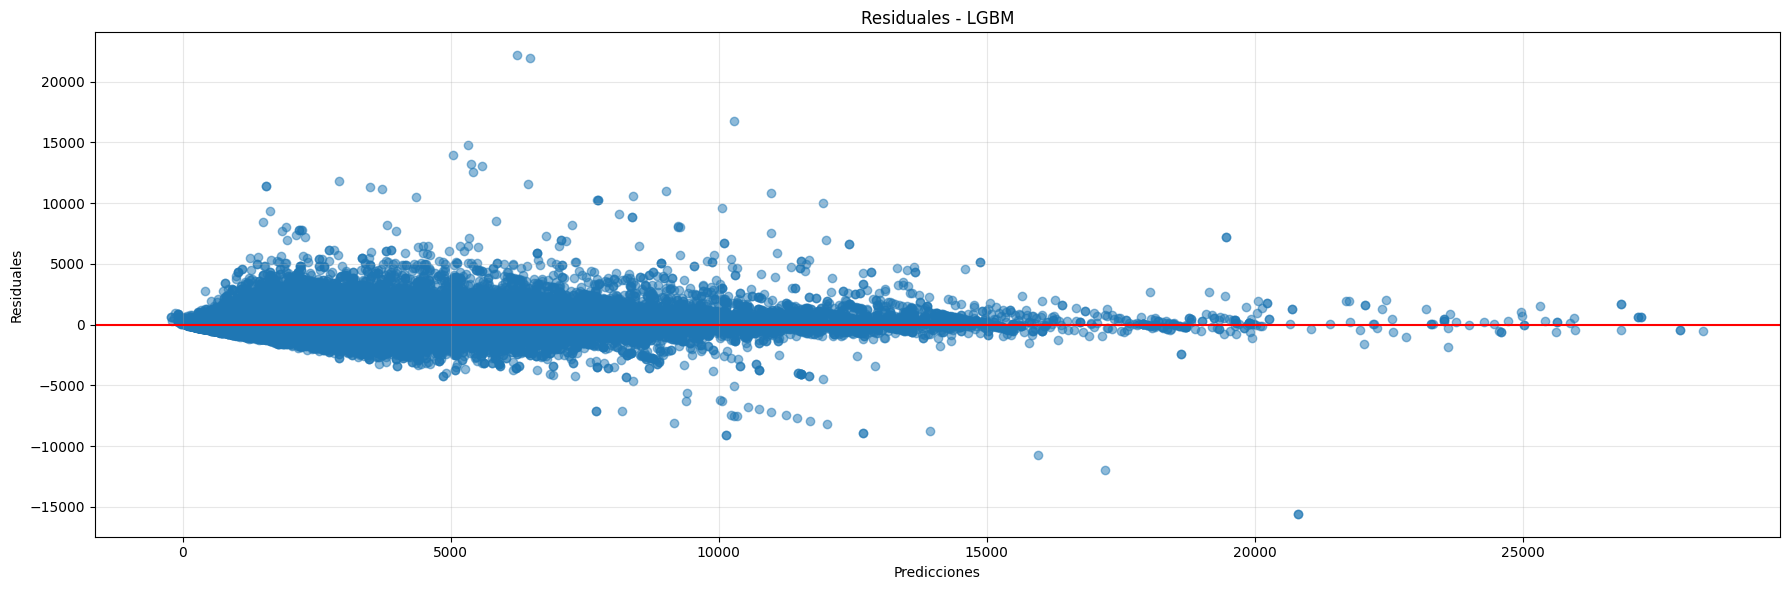

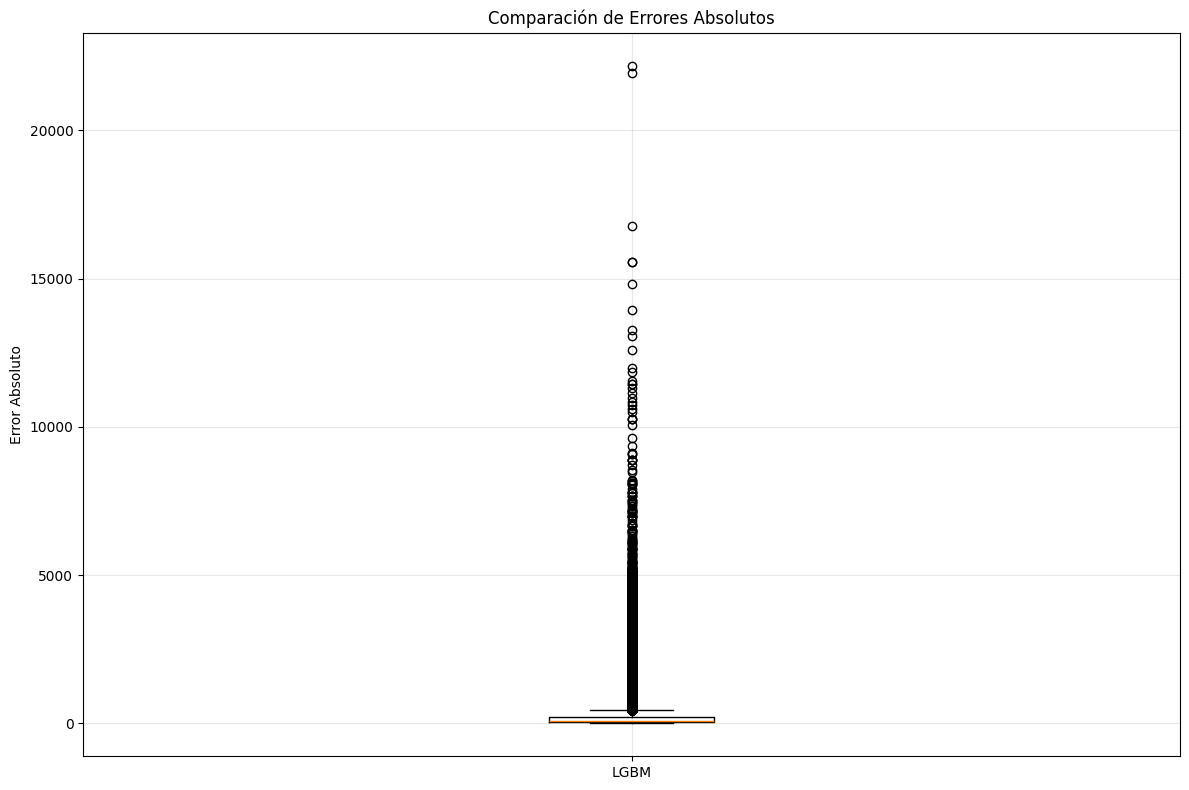

In [19]:
metrics = train_evaluate_regression_models(models, X_train_all, y_train, X_val_all, y_val, y_scaler, "II", artifacts_dir, cv_folds=0)

In [18]:
metrics

,MAE,RMSE,R²,Explained Variance,CV_MAE,CV_RMSE,CV_R²,CV_MAE_STD,CV_RMSE_STD,CV_R²_STD
LGBM,192.016413,351.383578,0.924768,0.924768,NaN,NaN,NaN,NaN,NaN,NaN
